In [38]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
import os
import PIL

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.8.0
Hub version: 0.12.0
GPU is NOT AVAILABLE


In [7]:
module_selection = ("mobilenet_v2_100_224", 224) 
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32 

Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)


#  Setup dataset

In [16]:
path_to_downloaded_file = tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True)

228827136/228813984 [==============================] - 4s 0us/step


In [17]:
print(path_to_downloaded_file)

/root/.keras/datasets/flower_photos


In [20]:
data_dir = tf.keras.utils.get_file(
    'litter_sample_dataset',
    'http://713a-73-11-165-97.ngrok.io/litter_sample_dataset.tgz',
    untar=True)

304144384/304133512 [==============================] - 514s 2us/step


In [19]:
print(data_dir)

garbageclassification


In [22]:
# data_dir2 is just for showing some samples 
import pathlib
# data_dir = "litter_sample_dataset"
data_dir2 = pathlib.Path(data_dir)
image_count = len(list(data_dir2.glob('*/*.jpg')))
print(image_count)

3661


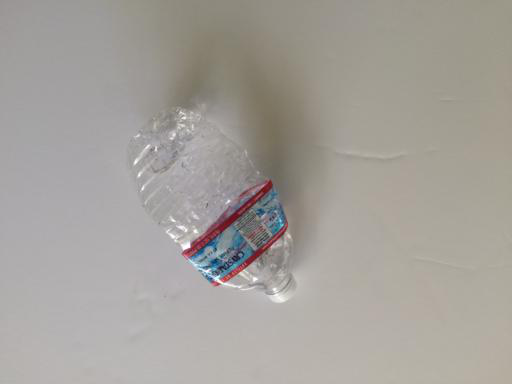

In [23]:
plastic = list(data_dir2.glob('plastic/*'))
PIL.Image.open(str(plastic[0]))

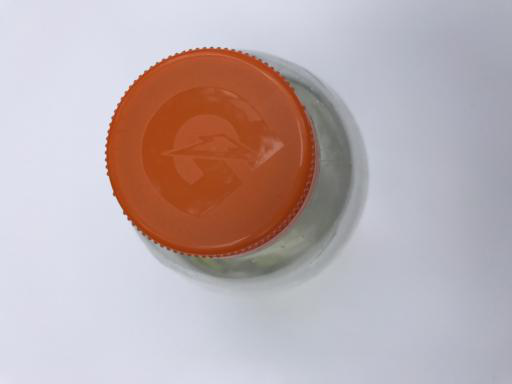

In [ ]:
PIL.Image.open(str(plastic[2]))

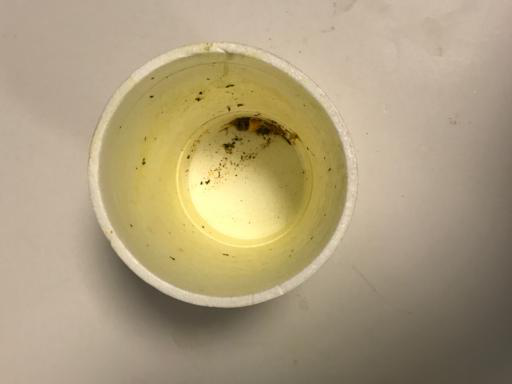

In [ ]:
wrapper = list(data_dir2.glob('wrapper/*'))
PIL.Image.open(str(wrapper[0]))

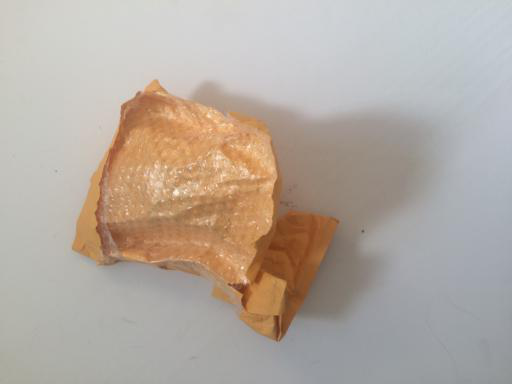

In [ ]:
PIL.Image.open(str(wrapper[5]))

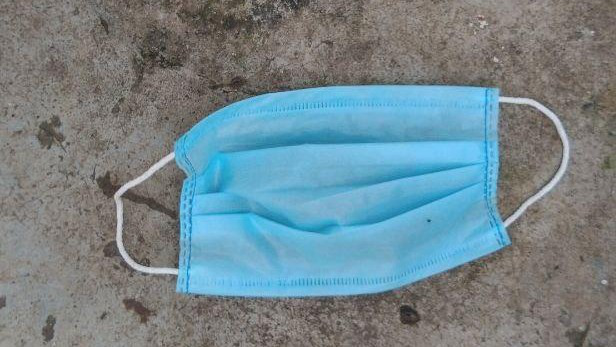

In [ ]:
mask = list(data_dir2.glob('mask/*'))
PIL.Image.open(str(mask[0]))

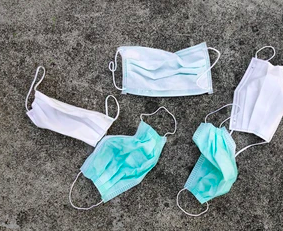

In [ ]:
PIL.Image.open(str(mask[6]))

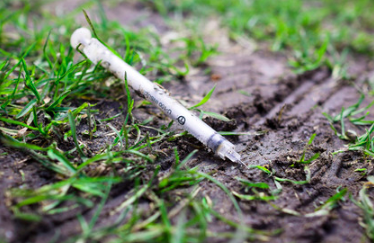

In [ ]:
syringe = list(data_dir2.glob('syringe/*'))
PIL.Image.open(str(syringe[2]))

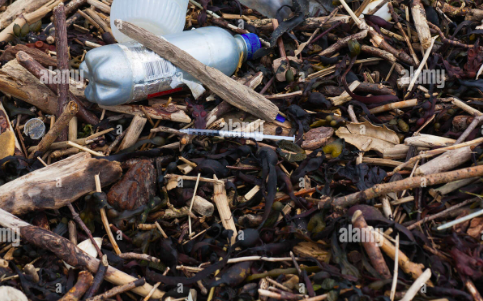

In [ ]:
syringe = list(data_dir2.glob('syringe/*'))
PIL.Image.open(str(syringe[8]))

# Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
# datagen_kwargs = dict(rescale=1./255, validation_split=.020)
# dataflow_kwargs = dict(target_size=IMAGE_SIZE, 
#                       batch_size=BATCH_SIZE,
#                       interpolation="bilinear")

# valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     **datagen_kwargs)

# valid_generator = valid_datagen.flow_from_directory(
#     data_dir, subset="validation", 
#     shuffle=False, **dataflow_kwargs)

Found 72 images belonging to 13 classes.


In [25]:
# do_data_augmentation = False 
# if do_data_augmentation:
#   train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#                                                         rotation_range=40,
#                                                         horizontal_flip=True,
#                                                         width_shift_range=0.2, 
#                                                         height_shift_range=0.2,
#                                                         shear_range=0.2, 
#                                                         zoom_range=0.2,
#                                                         **datagen_kwargs)
# else:
#   train_datagen = valid_datagen

# train_generator = train_datagen.flow_from_directory(
#                                                     data_dir, 
#                                                     subset="training", 
#                                                     shuffle=True, 
#                                                     **dataflow_kwargs)

Found 3704 images belonging to 13 classes.


In [ ]:
# class_names = train_generator.class_indices.items()
# print(class_names)

In [47]:
batch_size = 32
img_height = 180
img_width = 180

In [48]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3776 files belonging to 13 classes.
Using 3021 files for training.
Found 3776 files belonging to 13 classes.
Using 755 files for validation.


In [50]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'garbage', 'glass', 'leaf', 'mask', 'metal', 'paper', 'plastic', 'polythenebag', 'recyclable', 'syringe', 'test', 'wrapper']


# Visualize the data 

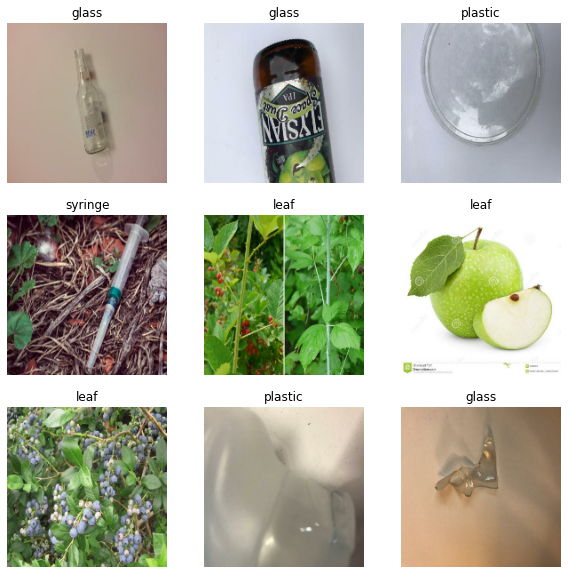

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Charts
import seaborn as sns

# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

sns.countplot(x='catagories', data = list(train_ds))


In [41]:
data_dir2.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

AttributeError: ignored

In [54]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Defining the model

In [55]:
# Tuning

# do_fine_tuning = False

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data
RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling

In [57]:
normalization_layer = layers.Rescaling(1./255)

In [58]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.022270128 0.94350755


# Create the model

In [34]:
# import tensorflow as tf
# print("Building model with", MODULE_HANDLE)
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
#     hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
#     tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Dense(train_generator.num_classes,
#                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
# ])
# model.build((None,)+IMAGE_SIZE+(3,))
# model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 13)                16653     
                                                                 
Total params: 2,274,637
Trainable params: 16,653
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

# Compile the model

In [59]:
# model.compile(
#   optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
#   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
#   metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

# Train the model

In [ ]:
# steps_per_epoch = train_generator.samples // train_generator.batch_size
# validation_steps = valid_generator.samples // valid_generator.batch_size

# hist = model.fit(
#     train_generator,
#     epochs=5, steps_per_epoch=steps_per_epoch,
#     validation_data = valid_generator,
#     validation_steps = validation_steps).history

In [61]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
95/95 [==============================] - 111s 1s/step - loss: 1.4116 - accuracy: 0.4988 - val_loss: 1.2040 - val_accuracy: 0.5483
Epoch 2/10
95/95 [==============================] - 107s 1s/step - loss: 1.0165 - accuracy: 0.6299 - val_loss: 1.0384 - val_accuracy: 0.6411
Epoch 3/10
95/95 [==============================] - 122s 1s/step - loss: 0.8535 - accuracy: 0.6948 - val_loss: 0.9894 - val_accuracy: 0.6755
Epoch 4/10
95/95 [==============================] - 123s 1s/step - loss: 0.6774 - accuracy: 0.7577 - val_loss: 0.9601 - val_accuracy: 0.7073
Epoch 5/10
95/95 [==============================] - 103s 1s/step - loss: 0.5119 - accuracy: 0.8199 - val_loss: 0.8910 - val_accuracy: 0.7033
Epoch 6/10
95/95 [==============================] - 104s 1s/step - loss: 0.4209 - accuracy: 0.8520 - val_loss: 0.9324 - val_accuracy: 0.7113
Epoch 7/10
95/95 [==============================] - 103s 1s/step - loss: 0.2905 - accuracy: 0.9017 - val_loss: 0.9496 - val_accuracy: 0.7391
Epoch 8/10
95

In [ ]:
# confusion matrix creates crashes the entire session , todo : find out why ?
# conf_mat = confusion_matrix(np.argmax(train_generator,axis = 1),model.predict(train_generator))
# print(conf_mat)

# Visualize training results

NameError: ignored

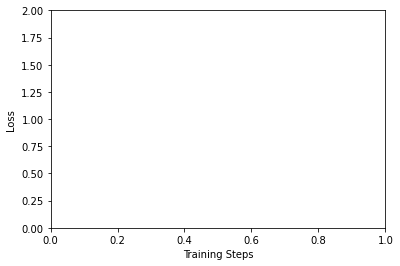

In [64]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.figure()
# plt.ylabel("Loss ")
# plt.xlabel("Training Steps")
# plt.ylim([0,2])
# plt.plot(hist["loss"], lable="training loss")
# plt.plot(hist["val_loss"], label = "validation loss")
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')

# plt.figure()
# plt.ylabel("Accuracy")
# plt.xlabel("Training Steps")
# plt.ylim([0,1])
# plt.plot(hist["accuracy"], title="training accuracy")
# plt.plot(hist["val_accuracy"], title="validation accuracy")
# plt.legend(loc='upper right')
# plt.title('Training and Validation Accuracy')

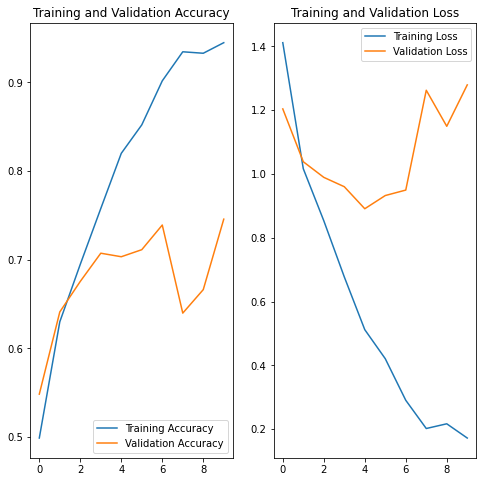

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [ ]:
x, y = valid_generator[1]
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

# Predict on new data

Populating the interactive namespace from numpy and matplotlib


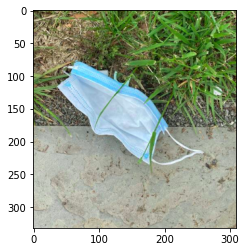

Populating the interactive namespace from numpy and matplotlib


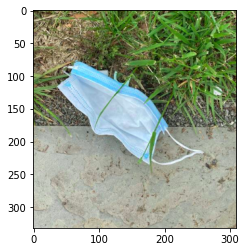

 mask with a 99.67 percent confidence.


In [80]:
# litter_url = "http://d668966ed0a6.ngrok.io/bottle1.jpg"
# litter_path = tf.keras.utils.get_file('plastic', origin=litter_url)
sample_path = "/content/Screenshot from 2022-03-17 22-21-51.png"

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgsample = mpimg.imread(sample_path)
imgplot = plt.imshow(imgsample)
plt.show()

img = tf.keras.preprocessing.image.load_img(
    sample_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
# print(predictions)
# print(list(class_names))
# print(score)

print("{} with a {:.2f} percent confidence."
    .format(list(class_names)[np.argmax(score)], 100 * np.max(score)) )

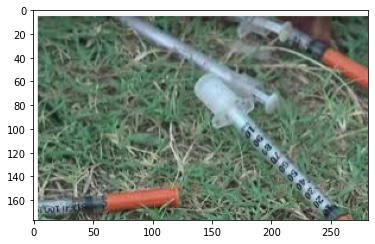

syringe with a 97.89 percent confidence.


In [81]:
sample_path = "/content/Screenshot from 2022-03-17 22-26-38.png"
imgsample = mpimg.imread(sample_path)
imgplot = plt.imshow(imgsample)
plt.show()

img = tf.keras.preprocessing.image.load_img(
    sample_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("{} with a {:.2f} percent confidence."
    .format(list(class_names)[np.argmax(score)], 100 * np.max(score)) )

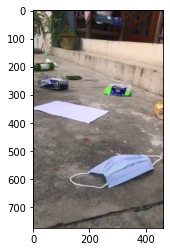

leaf with a 42.49 percent confidence.


In [83]:
sample_path = "/content/mask1.png"
imgsample = mpimg.imread(sample_path)
imgplot = plt.imshow(imgsample)
plt.show()

img = tf.keras.preprocessing.image.load_img(
    sample_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("{} with a {:.2f} percent confidence."
    .format(list(class_names)[np.argmax(score)], 100 * np.max(score)) )

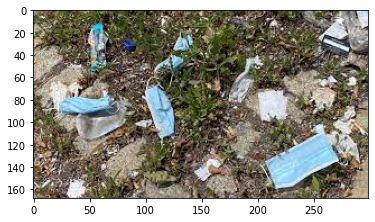

paper with a 88.22 percent confidence.


In [84]:
sample_path = "/content/mask2.jpeg"
imgsample = mpimg.imread(sample_path)
imgplot = plt.imshow(imgsample)
plt.show()

img = tf.keras.preprocessing.image.load_img(
    sample_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("{} with a {:.2f} percent confidence."
    .format(list(class_names)[np.argmax(score)], 100 * np.max(score)) )

# Save the Model 

In [82]:
saved_model_path = "/tmp/saved_garbageclassification_model"
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /tmp/saved_garbageclassification_model/assets


INFO:tensorflow:Assets written to: /tmp/saved_garbageclassification_model/assets
